In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

df_raw = pd.read_csv('Air_Quality.csv')
print('Shape after import:', df_raw.shape)
df_raw.head()


Shape after import: (18862, 12)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [398]:
# KEEP ONLY PM2.5 ROWS 
df_pm = df_raw[df_raw['Indicator ID'] == 365].copy()
print('Shape after keeping Indicator ID = 365 (PM2.5):', df_pm.shape)
df_pm.head()

Shape after keeping Indicator ID = 365 (PM2.5): (6345, 12)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18,170430,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307,Sunset Park (CD7),Annual Average 2013,12/01/2012,9.180000,NaN
19,410984,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,107,Upper West Side (CD7),Winter 2015-16,12/01/2015,8.850000,NaN
20,742558,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Winter 2020-21,12/01/2020,6.331093,NaN
21,169393,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2010,06/01/2010,10.740000,NaN
22,169452,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2011,06/01/2011,10.590000,NaN


In [399]:
# KEEP ONLY “Mean” MEASURE 
print('Measures left:', df_pm['Measure'].value_counts())
df_mean = df_pm[df_pm['Measure'] == 'Mean'].copy()
print('Shape after keeping Measure = Mean:', df_mean.shape)
df_mean.head()

Measures left: Measure
Mean    6345
Name: count, dtype: int64
Shape after keeping Measure = Mean: (6345, 12)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18,170430,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307,Sunset Park (CD7),Annual Average 2013,12/01/2012,9.180000,NaN
19,410984,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,107,Upper West Side (CD7),Winter 2015-16,12/01/2015,8.850000,NaN
20,742558,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Winter 2020-21,12/01/2020,6.331093,NaN
21,169393,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2010,06/01/2010,10.740000,NaN
22,169452,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2011,06/01/2011,10.590000,NaN


In [400]:
# DROP REDUNDANT COLUMNS 
drops = ['Unique ID','Indicator ID','Name','Measure','Measure Info','Message']
df_drop = df_mean.drop(columns=drops)
print('Columns after drop:', df_drop.columns.tolist())
df_drop.head()

Columns after drop: ['Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value']


,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
18,CD,307,Sunset Park (CD7),Annual Average 2013,12/01/2012,9.180000
19,CD,107,Upper West Side (CD7),Winter 2015-16,12/01/2015,8.850000
20,CD,414,Rockaway and Broad Channel (CD14),Winter 2020-21,12/01/2020,6.331093
21,CD,414,Rockaway and Broad Channel (CD14),Summer 2010,06/01/2010,10.740000
22,CD,414,Rockaway and Broad Channel (CD14),Summer 2011,06/01/2011,10.590000


In [401]:
# CLEAN TARGET COLUMN
df_drop['Data Value'] = pd.to_numeric(df_drop['Data Value'], errors='coerce')
df_clean = df_drop.dropna(subset=['Data Value']).copy()
print('Shape after coerce + NaN drop:', df_clean.shape)
df_clean.head()

Shape after coerce + NaN drop: (6345, 6)


,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
18,CD,307,Sunset Park (CD7),Annual Average 2013,12/01/2012,9.180000
19,CD,107,Upper West Side (CD7),Winter 2015-16,12/01/2015,8.850000
20,CD,414,Rockaway and Broad Channel (CD14),Winter 2020-21,12/01/2020,6.331093
21,CD,414,Rockaway and Broad Channel (CD14),Summer 2010,06/01/2010,10.740000
22,CD,414,Rockaway and Broad Channel (CD14),Summer 2011,06/01/2011,10.590000


In [402]:
# MISSING CHECK
print('Missing per column:')
print(df_clean.isna().sum())

Missing per column:
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64


In [403]:
# TEMPORAL FEATURES 
df_clean['Start_Date'] = pd.to_datetime(df_clean['Start_Date'])
df_clean['year']   = df_clean['Start_Date'].dt.year
df_clean['month']  = df_clean['Start_Date'].dt.month
df_clean['season'] = (df_clean['month'] % 12 // 3 + 1).astype(int)
df_clean[['Start_Date','year','month','season']].head()

,Start_Date,year,month,season
18,2012-12-01,2012,12,1
19,2015-12-01,2015,12,1
20,2020-12-01,2020,12,1
21,2010-06-01,2010,6,3
22,2011-06-01,2011,6,3


In [404]:
# Convert Data Value to numeric first 
df_raw2 = df_raw.copy()
df_raw2["Start_Date"] = pd.to_datetime(df_raw2["Start_Date"])
df_raw2["Data Value"] = pd.to_numeric(df_raw2["Data Value"], errors="coerce")

audit = (df_raw2
         .loc[df_raw2["Measure"] == "Mean"]
         .pivot_table(index=["Geo Place Name", "Start_Date"],
                      columns="Indicator ID",
                      values="Data Value",
                      aggfunc="first")
         .rename(columns={365: "PM2.5", 375: "NO2", 386: "O3"}))

# Safety check (prevents KeyError)
needed = ["PM2.5", "NO2", "O3"]
missing_cols = [c for c in needed if c not in audit.columns]
if missing_cols:
    print("WARNING: These pollutant columns are missing:", missing_cols)
    print("Available columns (Indicator IDs):", list(audit.columns)[:25])

audit_keys = audit.dropna(subset=["PM2.5"]).copy()

print("Keys total:", len(audit_keys))
print("Keys with PM2.5 + NO2:", audit_keys[["PM2.5","NO2"]].notna().all(axis=1).sum() if "NO2" in audit_keys else "NO2 missing")
print("Keys with PM2.5 + NO2 + O3:", audit_keys[["PM2.5","NO2","O3"]].notna().all(axis=1).sum() if ("NO2" in audit_keys and "O3" in audit_keys) else "NO2/O3 missing")


Keys total: 4446
Keys with PM2.5 + NO2: 4446
Keys with PM2.5 + NO2 + O3: 1710


In [405]:
# build wide modelling table
wide = audit_keys.reset_index()
wide["year"] = wide["Start_Date"].dt.year
wide["month"] = wide["Start_Date"].dt.month
wide["season"] = ((wide["month"] % 12) // 3 + 1).astype(int)

if "NO2" in wide.columns:
    wide["NO2"] = wide["NO2"].fillna(wide["NO2"].median())
if "O3" in wide.columns:
    wide["O3"] = wide["O3"].fillna(wide["O3"].median())

print("Wide shape:", wide.shape)
wide.head()


Wide shape: (4446, 8)


Indicator ID,Geo Place Name,Start_Date,PM2.5,NO2,O3,year,month,season
0,Bay Ridge and Dyker Heights (CD10),2008-12-01,10.18,28.35,30.718236,2008,12,1
1,Bay Ridge and Dyker Heights (CD10),2009-06-01,10.77,20.38,25.560000,2009,6,3
2,Bay Ridge and Dyker Heights (CD10),2009-12-01,9.77,26.97,30.718236,2009,12,1
3,Bay Ridge and Dyker Heights (CD10),2010-06-01,11.74,18.08,33.440000,2010,6,3
4,Bay Ridge and Dyker Heights (CD10),2010-12-01,12.46,29.44,30.718236,2010,12,1


In [406]:
# train/test split

from sklearn.model_selection import train_test_split

cat_cols = ["Geo Place Name"]
num_cols = ["year", "month", "season", "NO2", "O3"]

X = wide[cat_cols + num_cols]
y_reg = wide["PM2.5"]

# EPA-like bins 
y_cla = pd.cut(
    y_reg,
    bins=[-np.inf, 12, 35.2, 55.4, 150.4, 250.4, np.inf],
    labels=["Good", "Moderate", "U-S", "Unhealthy", "V-U", "Hazardous"]
)

# If stratify fails, remove stratify=y_cla
X_train, X_test, y_reg_train, y_reg_test, y_cla_train, y_cla_test = train_test_split(
    X, y_reg, y_cla, test_size=0.2, random_state=42, stratify=y_cla
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (3556, 6) Test: (890, 6)


In [407]:
# PRE-PROCESSING PIPELINE 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ]
)

reg_pipe = Pipeline(steps=[
    ("prep", pre),
    ("linreg", LinearRegression())
])


In [408]:
# TRAIN 
from sklearn.linear_model import LinearRegression

reg_pipe.fit(X_train, y_reg_train)
print('Training finished – intercept =', reg_pipe['linreg'].intercept_)

Training finished – intercept = 8.812349446048362


In [409]:
# PREDICT
y_pred_reg = reg_pipe.predict(X_test)
res_df = pd.DataFrame({'Actual':y_reg_test.values, 'Predicted':y_pred_reg})
print(res_df.head(10))

      Actual  Predicted
0  10.330000  10.493520
1   8.010000   7.922806
2  10.780000   9.426896
3   9.880000  10.493910
4   8.040000   8.889846
5  10.280000  10.030374
6   8.910000   8.767392
7  11.250000  10.732840
8   8.150000   9.246045
9   9.365248   7.195326


In [410]:
# METRICS
from sklearn.metrics import mean_absolute_error, r2_score

mae  = mean_absolute_error(y_reg_test, y_pred_reg)
rmse = np.sqrt(np.mean((y_pred_reg - y_reg_test)**2))
r2   = r2_score(y_reg_test, y_pred_reg)
print(f'MAE  = {mae:.2f} μg/m³')
print(f'RMSE = {rmse:.2f} μg/m³')
print(f'R²   = {r2:.3f}')

MAE  = 0.62 μg/m³
RMSE = 0.88 μg/m³
R²   = 0.823


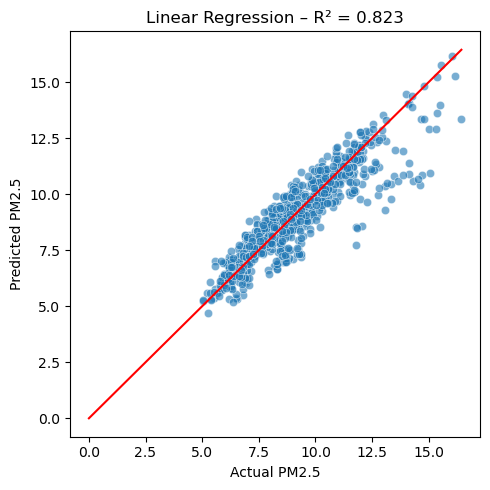

In [411]:
# SCATTER PLOT 
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test, y=y_pred_reg, alpha=0.6)
plt.plot([0, y_reg_test.max()], [0, y_reg_test.max()], "r")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title(f"Linear Regression – R² = {r2:.3f}")
plt.tight_layout()
plt.show()

In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipe = Pipeline(steps=[
    ("prep", pre),
    ("dt", DecisionTreeClassifier(
        random_state=42,
        max_depth=6,
        min_samples_leaf=10
    ))
])

dt_pipe.fit(X_train, y_cla_train)
print("Decision Tree classifier trained.")


Decision Tree classifier trained.


In [413]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_pipe.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_cla_test, y_pred_dt))
print(classification_report(y_cla_test, y_pred_dt))


Decision Tree Accuracy: 0.9415730337078652
              precision    recall  f1-score   support

        Good       0.96      0.97      0.97       820
    Moderate       0.64      0.59      0.61        70

    accuracy                           0.94       890
   macro avg       0.80      0.78      0.79       890
weighted avg       0.94      0.94      0.94       890



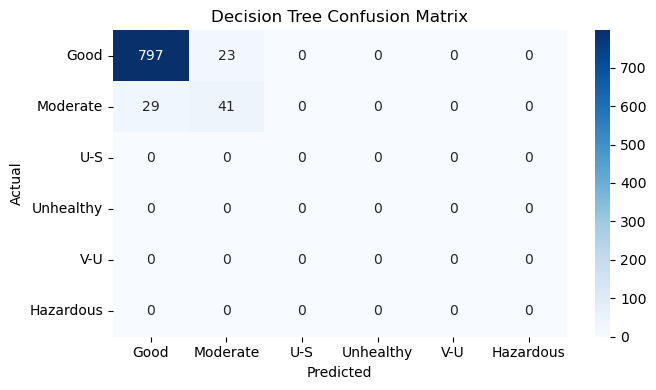

In [414]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Good", "Moderate", "U-S", "Unhealthy", "V-U", "Hazardous"]
cm = confusion_matrix(y_cla_test, y_pred_dt, labels=labels)

plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


In [415]:
# SINGLE DEMO 
demo_sample = pd.DataFrame([{
    "Geo Place Name": "Upper East Side (CD8)",
    "year": 2022,
    "month": 6,
    "season": (6 % 12 // 3 + 1),
    "NO2": 22.5,
    "O3": 30.1
}])

demo_pm25 = reg_pipe.predict(demo_sample)[0]
demo_label = dt_pipe.predict(demo_sample)[0]

print("Demo Prediction")
print("----------------")
print(f"Predicted PM2.5: {demo_pm25:.2f}")
print(f"Air Quality Category (Decision Tree): {demo_label}")

Demo Prediction
----------------
Predicted PM2.5: 9.29
Air Quality Category (Decision Tree): Good


In [416]:
import joblib

joblib.dump(reg_pipe, "pm25_NO2_O3_linreg.joblib")
joblib.dump(dt_pipe, "air_quality_dt.joblib")

print("Saved: pm25_NO2_O3_linreg.joblib")
print("Saved: air_quality_dt.joblib")


Saved: pm25_NO2_O3_linreg.joblib
Saved: air_quality_dt.joblib


In [417]:

print("\n--- Quick PM2.5 Prediction Application ---")

PLACES = [
    "Upper West Side (CD7)",
    "Upper East Side (CD8)",
    "Sunset Park (CD7)",
    "Flushing and Whitestone (CD7)",
    "Rockaway and Broad Channel (CD14)",
    "Bay Ridge and Dyker Heights (CD10)",
    "Central Brooklyn (CD9)",
    "Washington Heights (CD12)",
    "Other (type yourself)"
]

for i, place in enumerate(PLACES, start=1):
    print(f"{i}. {place}")

# Select district
while True:
    try:
        choice = int(input("Pick district number: "))
        if choice == len(PLACES):
            geo = input("Type district name: ").strip()
            break
        elif 1 <= choice < len(PLACES):
            geo = PLACES[choice - 1]
            break
        else:
            print("Please select a valid number.")
    except ValueError:
        print("Please enter a valid number.")

# Other inputs
yr  = int(input("Year (e.g. 2022): "))
mo  = int(input("Month (1-12): "))
no2 = float(input("NO₂ (ppb): "))
o3  = float(input("O₃ (ppb): "))

season = (mo % 12 // 3 + 1)

user_sample = pd.DataFrame([{
    "Geo Place Name": geo,
    "year": yr,
    "month": mo,
    "season": season,
    "NO2": no2,
    "O3": o3
}])

pred_pm25 = reg_pipe.predict(user_sample)[0]
dt_label = dt_pipe.predict(user_sample)[0]

# Display result table
print("\n+----------------+----------------+")
print("| Variable       | Value          |")
print("+----------------+----------------+")
print(f"| District       | {geo:<14} |")
print(f"| Year           | {yr:<14} |")
print(f"| Month          | {mo:<14} |")
print(f"| NO₂ (ppb)      | {no2:<14.2f} |")
print(f"| O₃ (ppb)       | {o3:<14.2f} |")
print(f"| PM2.5 (pred)   | {pred_pm25:<14.2f} |")
print(f"| Air Quality    | {dt_label:<14} |")
print("+----------------+----------------+")



--- Quick PM2.5 Prediction Application ---
1. Upper West Side (CD7)
2. Upper East Side (CD8)
3. Sunset Park (CD7)
4. Flushing and Whitestone (CD7)
5. Rockaway and Broad Channel (CD14)
6. Bay Ridge and Dyker Heights (CD10)
7. Central Brooklyn (CD9)
8. Washington Heights (CD12)
9. Other (type yourself)


Pick district number:  2
Year (e.g. 2022):  2025
Month (1-12):  4
NO₂ (ppb):  56
O₃ (ppb):  67



+----------------+----------------+
| Variable       | Value          |
+----------------+----------------+
| District       | Upper East Side (CD8) |
| Year           | 2025           |
| Month          | 4              |
| NO₂ (ppb)      | 56.00          |
| O₃ (ppb)       | 67.00          |
| PM2.5 (pred)   | 19.05          |
| Air Quality    | Good           |
+----------------+----------------+
